### What is Fraud?

Accourding to Oxford, Fraud a person or thing intended to deceive others, typically by unjustifiably claiming or being credited with accomplishments or qualities.

##### Now let's define Fraud Detection...
Fraud detection is a set of activities undertaken to prevent money or property from being obtained through false pretenses. Fraud detection is applied to many industries such as banking or insurance. In banking, fraud may include forging checks or using stolen credit cards. Other forms of fraud may involve exaggerating losses or causing an accident with the sole intent for the payout. *- Margaret Rouse, seachsecurity.techtarget.com*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#jupyter intelisense
%config IPCompleter.greedy=True

#### In this CAPSTONE, 
We will look into the probability of an activity being fraudulent

In [2]:
test_identity_df = pd.read_csv('downloads/fraud-detection/test_identity.csv')
test_transaction_df = pd.read_csv('downloads/fraud-detection/test_transaction.csv')
train_identity_df = pd.read_csv('downloads/fraud-detection/train_identity.csv')
train_transaction_df = pd.read_csv('downloads/fraud-detection/train_transaction.csv')

In [3]:
train_identity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [4]:
train_identity_df.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
train_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [6]:
train_identity_df.isnull().sum()*100/train_identity_df.isnull().count()

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [7]:
train_identity_df_clean = train_identity_df.drop(columns=['id_03','id_04','id_07','id_08','id_09','id_10',
                                                         'id_13','id_14','id_16','id_18','id_21','id_22','id_23',
                                                         'id_24','id_25','id_26','id_27','id_30','id_32','id_33',
                                                         'id_34'])

In [8]:
train_identity_df_clean.isnull().sum()*100/train_identity_df_clean.isnull().count()

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_05             5.108401
id_06             5.108401
id_11             2.256765
id_12             0.000000
id_15             2.251912
id_17             3.372321
id_19             3.407681
id_20             3.447200
id_28             2.256765
id_29             2.256765
id_31             2.739318
id_35             2.251912
id_36             2.251912
id_37             2.251912
id_38             2.251912
DeviceType        2.373243
DeviceInfo       17.726179
dtype: float64

In [9]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [10]:
train_transaction_df_clean = train_transaction_df[['TransactionID','isFraud','TransactionDT','TransactionAmt',
                                                  'card1','card2','card3','card5','addr1','addr2']].copy()

In [11]:
train_transaction_df_clean.isnull().sum()*100/train_transaction_df_clean.isnull().count()

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card5              0.721204
addr1             11.126427
addr2             11.126427
dtype: float64

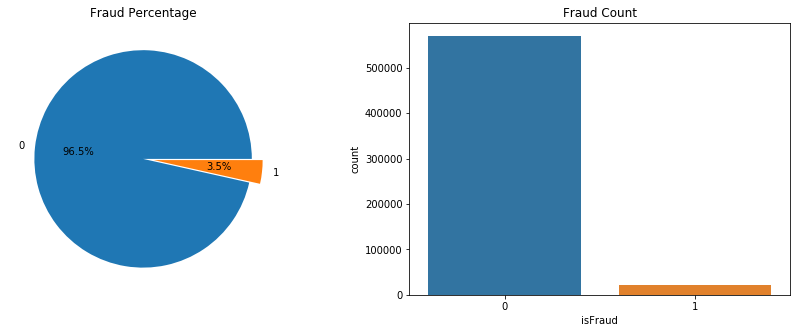

In [12]:
f,ax=plt.subplots(1,2,figsize=(15,5))
train_transaction_df_clean['isFraud'].value_counts().plot.pie(explode=[0,0.1],
                                               autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Fraud Percentage')
ax[0].set_ylabel('')
sns.countplot('isFraud',data=train_transaction_df_clean,ax=ax[1])
ax[1].set_title('Fraud Count')
plt.show()

In [13]:
train_df = pd.merge(train_identity_df_clean,train_transaction_df_clean, on='TransactionID', how='left')

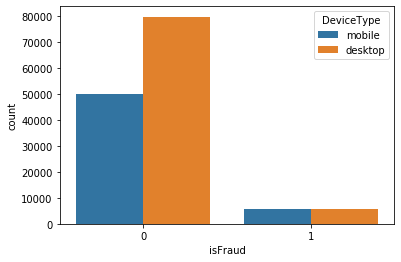

In [14]:
sns.countplot('isFraud',hue='DeviceType',data=train_df)
plt.show()

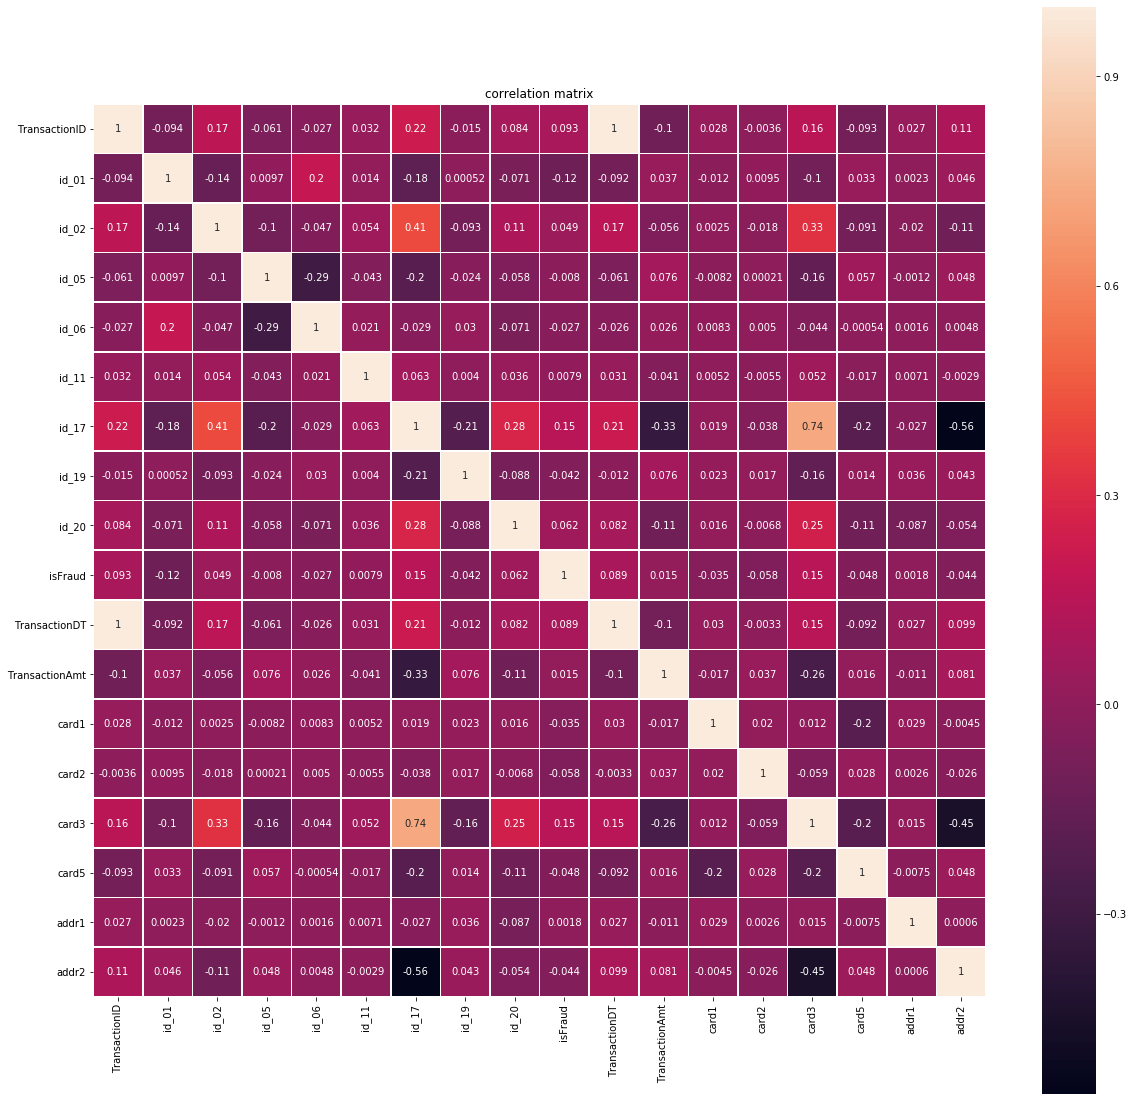

In [15]:
# make the correlation matrices.
train_cmat = train_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(train_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

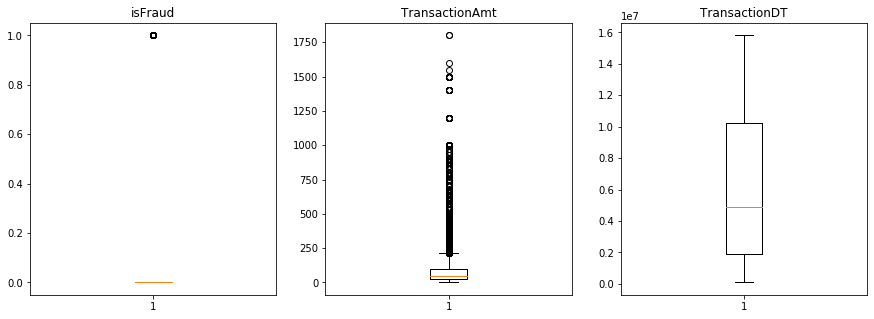

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["TransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

In [17]:
from scipy.stats.mstats import winsorize

train_df["wTransactionAmt"] = winsorized_views = winsorize(train_df["TransactionAmt"], (0, 0.15))


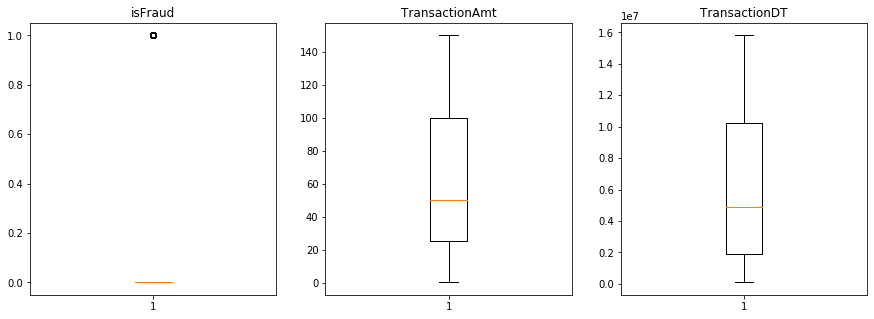

In [18]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["wTransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

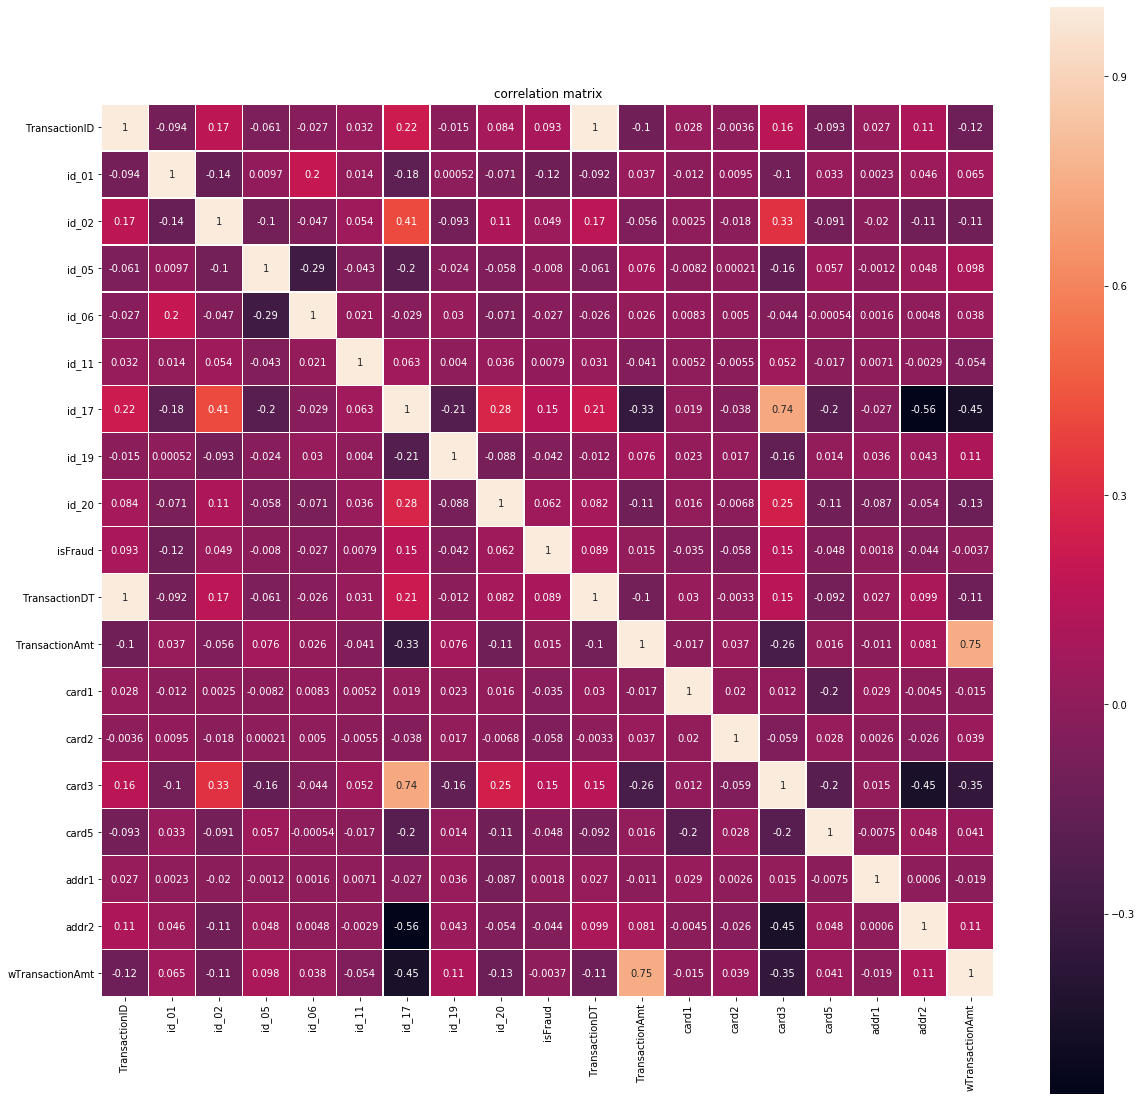

In [19]:
# make the correlation matrices.
train_cmat = train_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(train_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()

### Target and Feature Set

In [64]:
import statsmodels.api as sm

# Y is the target variable
y = train_df['isFraud']
# X is the feature set
X = train_df[['wTransactionAmt','TransactionDT']]

In [65]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    
    plt.legend(loc='upper right')
    plt.figure(figsize=(30,30))
    plt.show()

Removed indexes: [140098 132714  72331 ... 144204 144206 144229]


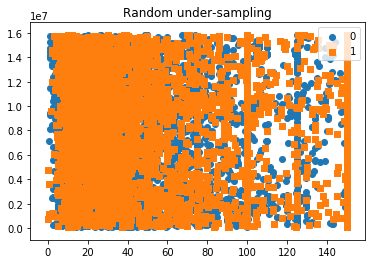

<Figure size 2160x2160 with 0 Axes>

In [66]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

In [67]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


X_rus = sm.add_constant(X_rus)

results = sm.OLS(y_rus, X_rus).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     349.4
Date:                Sun, 08 Dec 2019   Prob (F-statistic):          3.47e-150
Time:                        21:24:10   Log-Likelihood:                -16085.
No. Observations:               22636   AIC:                         3.218e+04
Df Residuals:                   22633   BIC:                         3.220e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3613      0.008     47.273      0.000       0.346       0.376
x1             0.0002   6.69e-05      2.761      0.006    5.36e-05       0.000
x2          1.848e-08   6.99e-10     26.436      0.000    1.71e-08    1.99e-08
==============================================================================
Omnibus:                    83595.017   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3325.515
Skew:                          -0.009   Prob(JB):                         0.00
Kurtosis:                       1.122   Cond. No.                     1.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 212664
The number of observations in test set is 53166


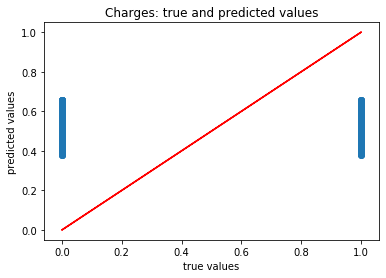

Mean absolute error of the prediction is: 0.48875460594857073
Mean squared error of the prediction is: 0.24513820113551024
Root mean squared error of the prediction is: 0.49511433137762256
Mean absolute percentage error of the prediction is: inf


In [25]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format
      (mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}"
      .format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

#### How you chose your model specification and what alternatives you compared it to

#### The practical uses of your model for an audience of interest

#### Any weak points or shortcomings of your model

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["TransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

train_df["wTransactionAmt"] = winsorized_views = winsorize(train_df["TransactionAmt"], (0, 0.15))


In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1) 
plt.boxplot(train_df["isFraud"]) 
plt.title("isFraud")

plt.subplot(1,3,2)
plt.boxplot(train_df["wTransactionAmt"])
plt.title("TransactionAmt")

plt.subplot(1,3,3)
plt.boxplot(train_df["TransactionDT"])
plt.title("TransactionDT")

plt.show()

In [ ]:
# make the correlation matrices.
train_cmat = train_df.corr()

plt.figure(figsize=(20,20))

# draw the heatmap using seaborn.
sns.heatmap(train_cmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()